In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import momlevel as ml
import gcsfs
import zarr
from matplotlib.ticker import FormatStrFormatter
import cftime
import datetime
import dask

In [2]:
woa18_1955_64_potential_temp = xr.open_zarr('../data/woa18/woa18_1955_1964_temperature',decode_times=False).potential_temperature
woa18_1965_74_potential_temp = xr.open_zarr('../data/woa18/woa18_1965_1974_temperature',decode_times=False).potential_temperature
woa18_1975_84_potential_temp = xr.open_zarr('../data/woa18/woa18_1975_1984_temperature',decode_times=False).potential_temperature
woa18_1985_94_potential_temp = xr.open_zarr('../data/woa18/woa18_1985_1994_temperature',decode_times=False).potential_temperature
woa18_1995_04_potential_temp = xr.open_zarr('../data/woa18/woa18_1995_2004_temperature',decode_times=False).potential_temperature
woa18_2005_17_potential_temp = xr.open_zarr('../data/woa18/woa18_2005_2017_temperature',decode_times=False).potential_temperature
woa18_decav_potential_temp = xr.open_zarr('../data/woa18/woa18_decav_temperature',decode_times=False).potential_temperature

In [3]:
woa18_1955_64_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

In [4]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

Text(0.5, 1.0, 'Ocean Basin Mask')

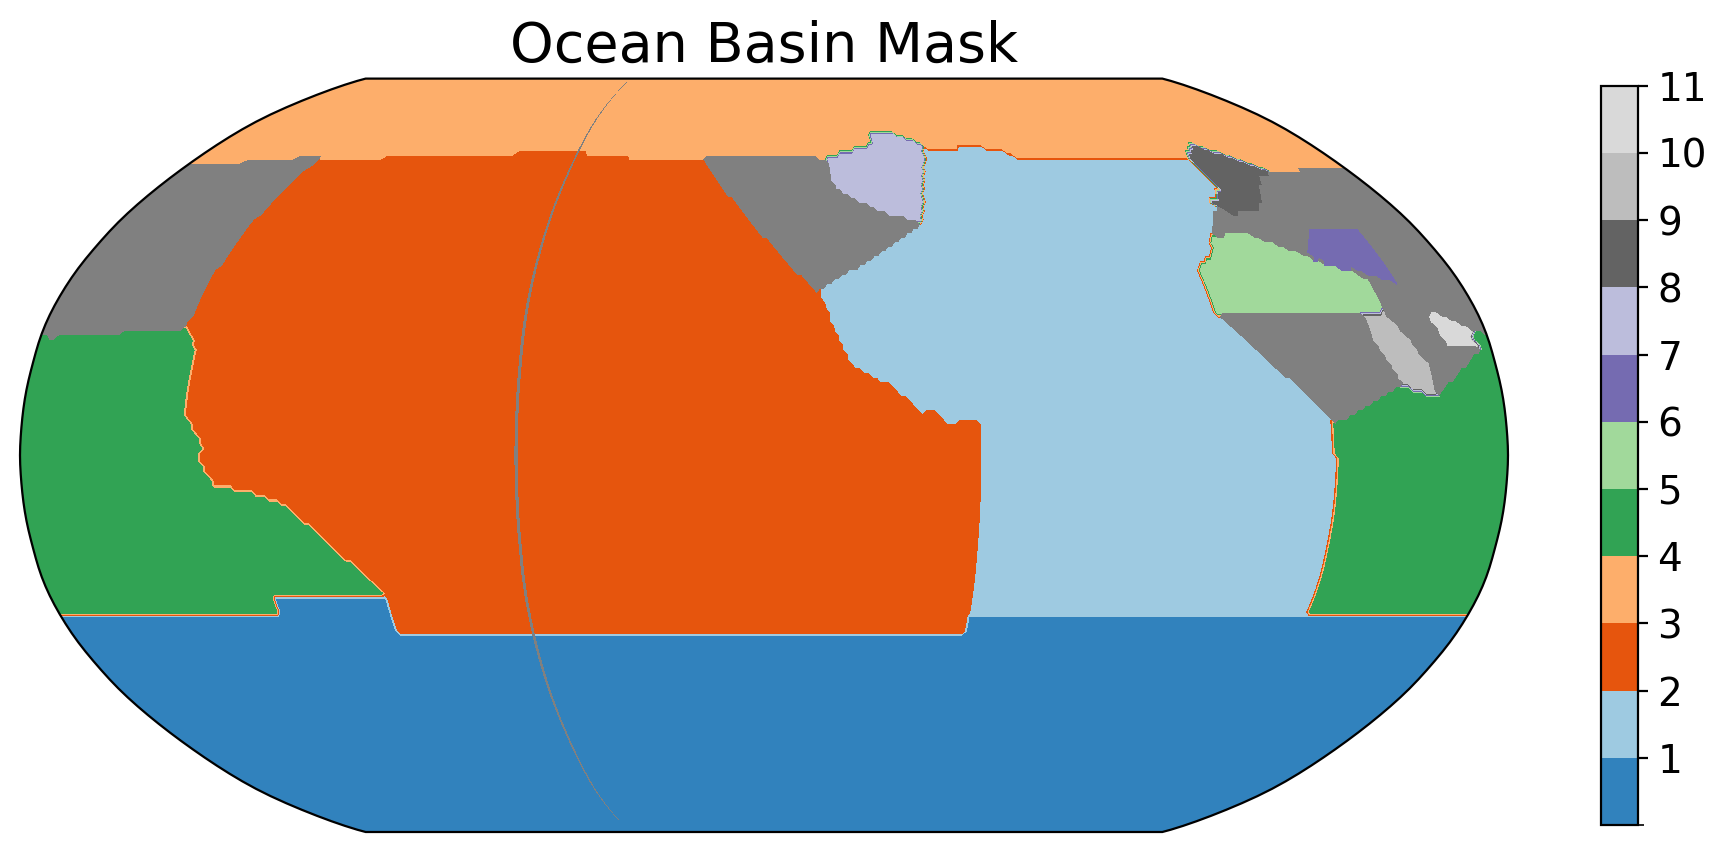

In [5]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [6]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2)) ### Values 1 over atlantic, NaN elsewhere
pacificocean=(woa18_basins.where(woa18_basins==3)/woa18_basins.where(woa18_basins==3))
arcticocean=(woa18_basins.where(woa18_basins==4)/woa18_basins.where(woa18_basins==4))
indianocean=(woa18_basins.where(woa18_basins==5)/woa18_basins.where(woa18_basins==5))
### and so on for the other basins ..... work through the code above step by step
### to make sure you understand it.

In [7]:
woa18_1955_64_atlantic = woa18_1955_64_potential_temp*atlanticocean

In [8]:
woa18_1955_64_indian = woa18_1955_64_potential_temp*indianocean

In [9]:
woa18_1955_64_pacific = woa18_1955_64_potential_temp*pacificocean

In [10]:
woa18_1955_64_southern = woa18_1955_64_potential_temp*southernocean

In [11]:
woa18_1955_64_arctic = woa18_1955_64_potential_temp*arcticocean

Text(0.5, 0.98, 'SST Atlantic 1955 to 1964 averaged')

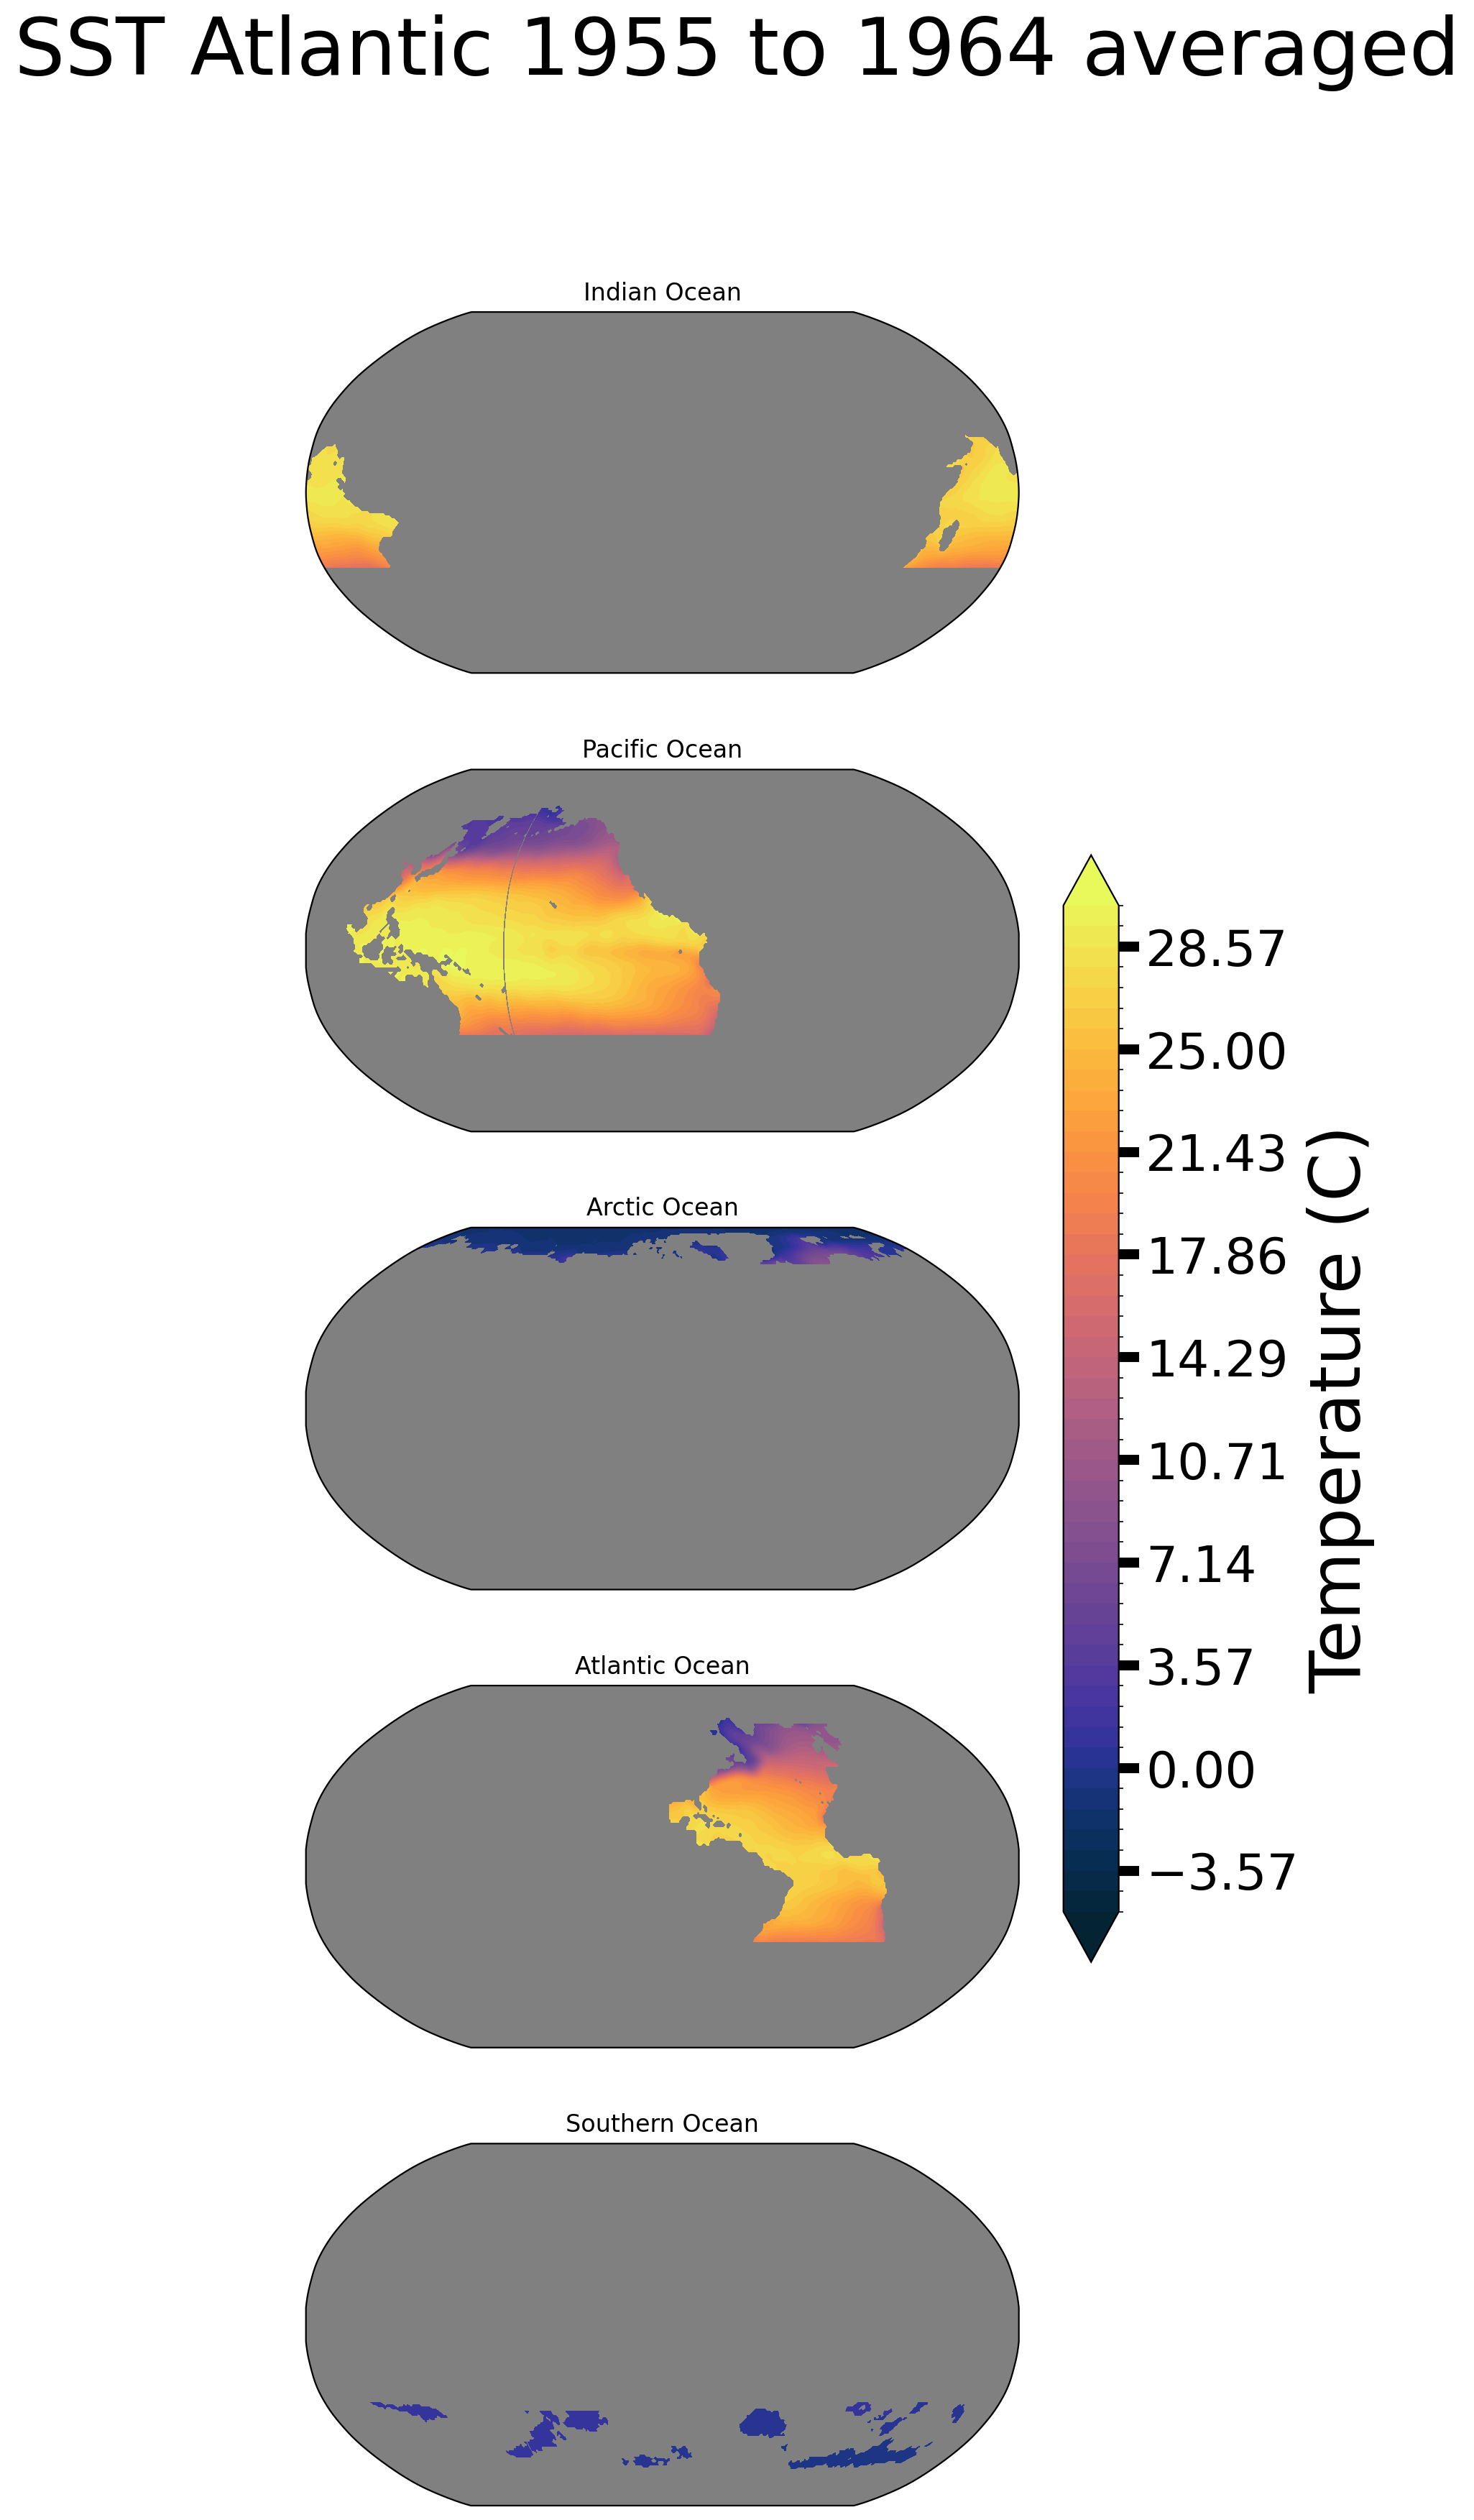

In [12]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-100),facecolor='grey')

fig, ax = plt.subplots(nrows=5,figsize=[8, 20],subplot_kw=subplot_kws)

p = woa18_1955_64_indian.isel(depth=0).plot.contourf(ax=ax[0],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,extend='both',
                        
                      
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_pacific.isel(depth=0).plot.contourf(ax=ax[1],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,
                         
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_arctic.isel(depth=0).plot.contourf(ax=ax[2],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,
                         extend='both',
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_atlantic.isel(depth=0).plot.contourf(ax=ax[3],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,extend='both',
                         
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_southern.isel(depth=-5).plot.contourf(ax=ax[4],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,extend='both',
                         
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
ax[0].set_title('Indian Ocean')
ax[1].set_title('Pacific Ocean')
ax[2].set_title('Arctic Ocean')
ax[3].set_title('Atlantic Ocean')
ax[4].set_title('Southern Ocean')
# add separate colorbar
cbar = fig.colorbar(p, ax=ax[0:5], orientation='vertical', label='Temperature (C)', 
                    extend='both', shrink=0.5)
cbar.set_label(label='Temperature (C)',size=35)
cbar.ax.tick_params(labelsize=25, length=10, width=5)
fig.suptitle("SST Atlantic 1955 to 1964 averaged",fontsize=40)

Text(0.5, 1.0, 'SST Atlantic 1955 to 1964 averaged')

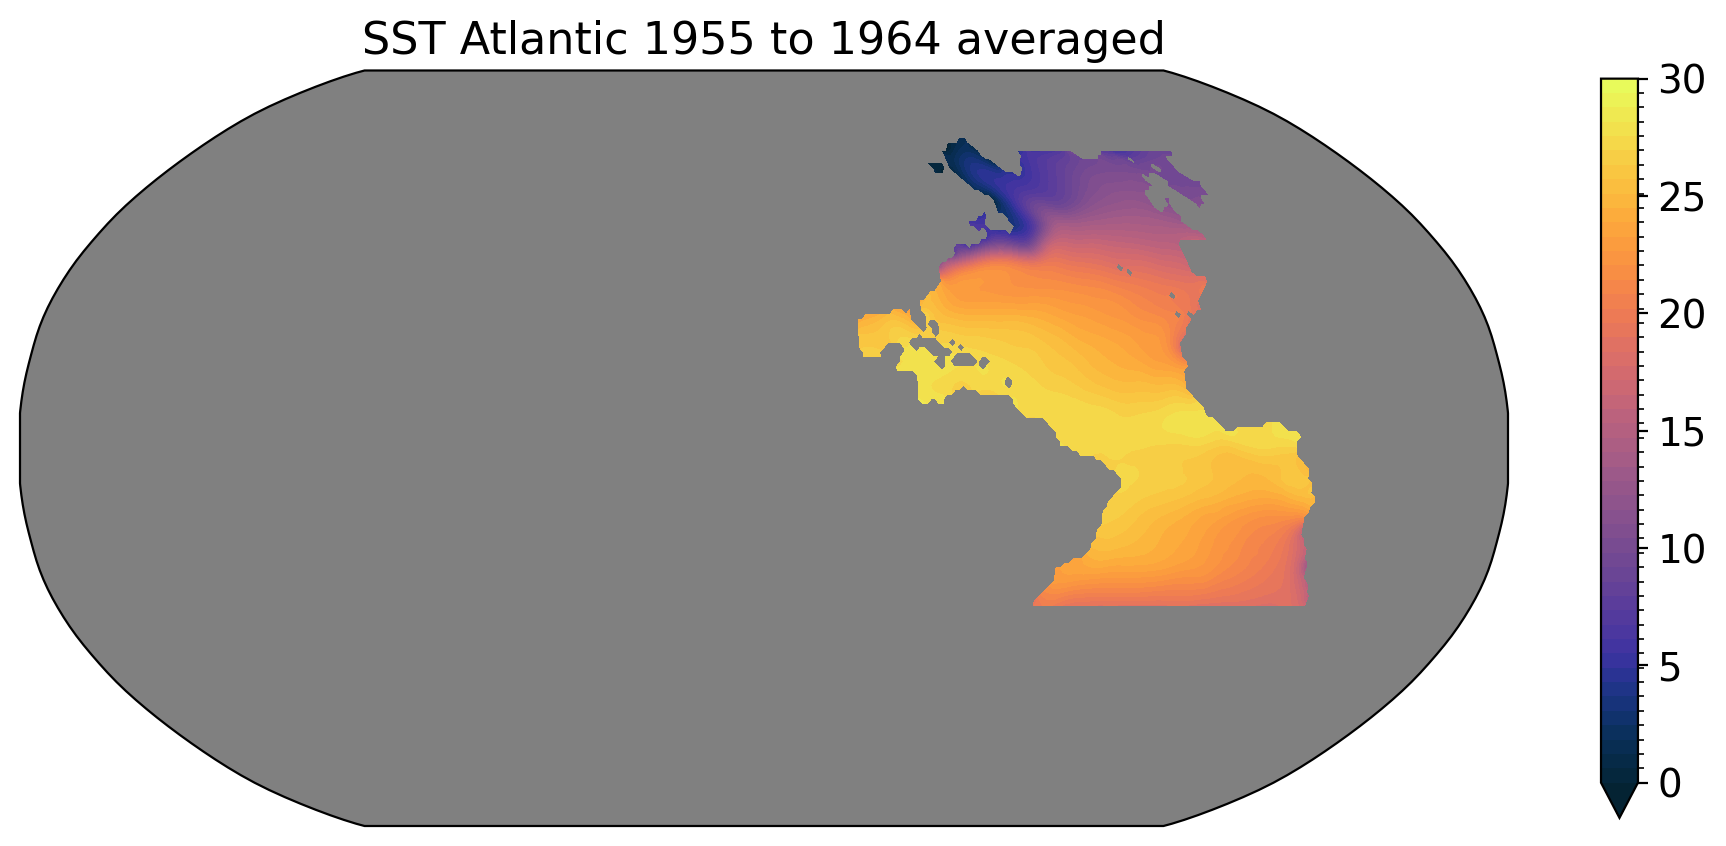

In [13]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1955_64_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 1955 to 1964 averaged",fontsize=16)

In [14]:
import warnings 

def standard_grid_cell_area(lat, lon, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    dLat = lat[1] - lat[0]
    dLon = lon[1] - lon[0]
    area = np.empty((len(lat), len(lon)))
    for j in range(0, len(lat)):
        for i in range(0, len(lon)):
            lon1 = lon[i] + dLon / 2
            lon0 = lon[i] - dLon / 2
            lat1 = lat[j] + dLat / 2
            lat0 = lat[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area

In [15]:
lat_woa =woa18_1955_64_potential_temp.coords['lat'].values #1-D numpy array of model's latitude values
lon_woa = woa18_1955_64_potential_temp.coords['lon'].values #1-D numpy array of model's longitude values

# make sure to replace the name of the data array if you chose a 
# different name and use the appropriate coordinate names within the ['']
# based on the coordinates of lat / lon in your dataset.

# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_woa,lon_woa)  

# The areacella_xarray function outputs a numpy array. Convert this back into 
# and xarray DataArray for further use. If this is a field you will be using 
# often. You may wish to save this newly created DataArray as a Dataset and save 
# as a netcdf file.

# here we assign dimensions and coordinates that are the same as our original SST array:

areacell_woa = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),\
                                                coords=(woa18_1955_64_potential_temp.coords['lat'],\
                                                        woa18_1955_64_potential_temp.coords['lon']))

In [16]:

weights_woa=areacell_woa


In [17]:
woa18_decav_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

In [18]:

weight_55_64_atlantic_0=( woa18_1955_64_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_pacific_0=( woa18_1955_64_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_southern_0=( woa18_1955_64_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_indian_0=( woa18_1955_64_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_arctic_0=( woa18_1955_64_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])


weight_65_74_atlantic_0=( woa18_1965_74_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_pacific_0=( woa18_1965_74_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_southern_0=( woa18_1965_74_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_indian_0=( woa18_1965_74_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_arctic_0=( woa18_1965_74_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_75_84_atlantic_0=( woa18_1975_84_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_pacific_0=( woa18_1975_84_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_southern_0=( woa18_1975_84_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_indian_0=( woa18_1975_84_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_arctic_0=( woa18_1975_84_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_85_94_atlantic_0=( woa18_1985_94_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_pacific_0=( woa18_1985_94_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_southern_0=( woa18_1985_94_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_indian_0=( woa18_1985_94_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_arctic_0=( woa18_1985_94_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_95_04_atlantic_0=( woa18_1995_04_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_pacific_0=( woa18_1995_04_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_southern_0=( woa18_1995_04_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_indian_0=( woa18_1995_04_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_arctic_0=( woa18_1995_04_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_05_17_atlantic_0=( woa18_2005_17_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_pacific_0=( woa18_2005_17_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_southern_0=( woa18_2005_17_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_indian_0=( woa18_2005_17_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_arctic_0=( woa18_2005_17_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_dec_atlantic_0=(woa18_decav_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_pacific_0=( woa18_decav_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_southern_0=( woa18_decav_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_indian_0=( woa18_decav_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_arctic_0=(woa18_decav_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

In [19]:
print(weight_55_64_atlantic_0.values+273.15)
print(weight_55_64_pacific_0.values+273.15)
print(weight_55_64_southern_0.values+273.15)
print(weight_55_64_indian_0.values+273.15)
print(weight_55_64_arctic_0.values+273.15)


294.8635393343315
296.0029267903509
280.0822753422839
299.07818246171024
273.38851683231576


In [20]:
print(weight_65_74_atlantic_0.values+273.15)
print(weight_65_74_pacific_0.values+273.15)
print(weight_65_74_southern_0.values+273.15)
print(weight_65_74_indian_0.values+273.15)
print(weight_65_74_arctic_0.values+273.15)


294.79516970544915
295.9584296517357
280.10723057381244
298.97054586023603
273.3212232859529


In [21]:
print(weight_75_84_atlantic_0.values+273.15)
print(weight_75_84_pacific_0.values+273.15)
print(weight_75_84_southern_0.values+273.15)
print(weight_75_84_indian_0.values+273.15)
print(weight_75_84_arctic_0.values+273.15)

294.87023239281694
296.0920506772965
280.24537872605873
299.20223869655234
273.2618570527621


In [22]:
print(weight_85_94_atlantic_0.values+273.15)
print(weight_85_94_pacific_0.values+273.15)
print(weight_85_94_southern_0.values+273.15)
print(weight_85_94_indian_0.values+273.15)
print(weight_85_94_arctic_0.values+273.15)

295.00480152523
296.2535499003611
280.2870299005378
299.1996023300199
273.22590047631775


In [23]:
print(weight_95_04_atlantic_0.values+273.15)
print(weight_95_04_pacific_0.values+273.15)
print(weight_95_04_southern_0.values+273.15)
print(weight_95_04_indian_0.values+273.15)
print(weight_95_04_arctic_0.values+273.15)

295.29045521228403
296.4106378384172
280.254141464555
299.3552312848949
273.524333363981


In [24]:
print(weight_05_17_atlantic_0.values+273.15)
print(weight_05_17_pacific_0.values+273.15)
print(weight_05_17_southern_0.values+273.15)
print(weight_05_17_indian_0.values+273.15)
print(weight_05_17_arctic_0.values+273.15)

295.40189464969444
296.4952002185726
280.26222795997495
299.57356057222046
273.62513864820465


In [25]:
print(weight_dec_atlantic_0.values+273.15)
print(weight_dec_pacific_0.values+273.15)
print(weight_dec_southern_0.values+273.15)
print(weight_dec_indian_0.values+273.15)
print(weight_dec_arctic_0.values+273.15)


295.02362195447733
296.18980764587377
280.1829316938642
299.2181238822741
273.36265266604335


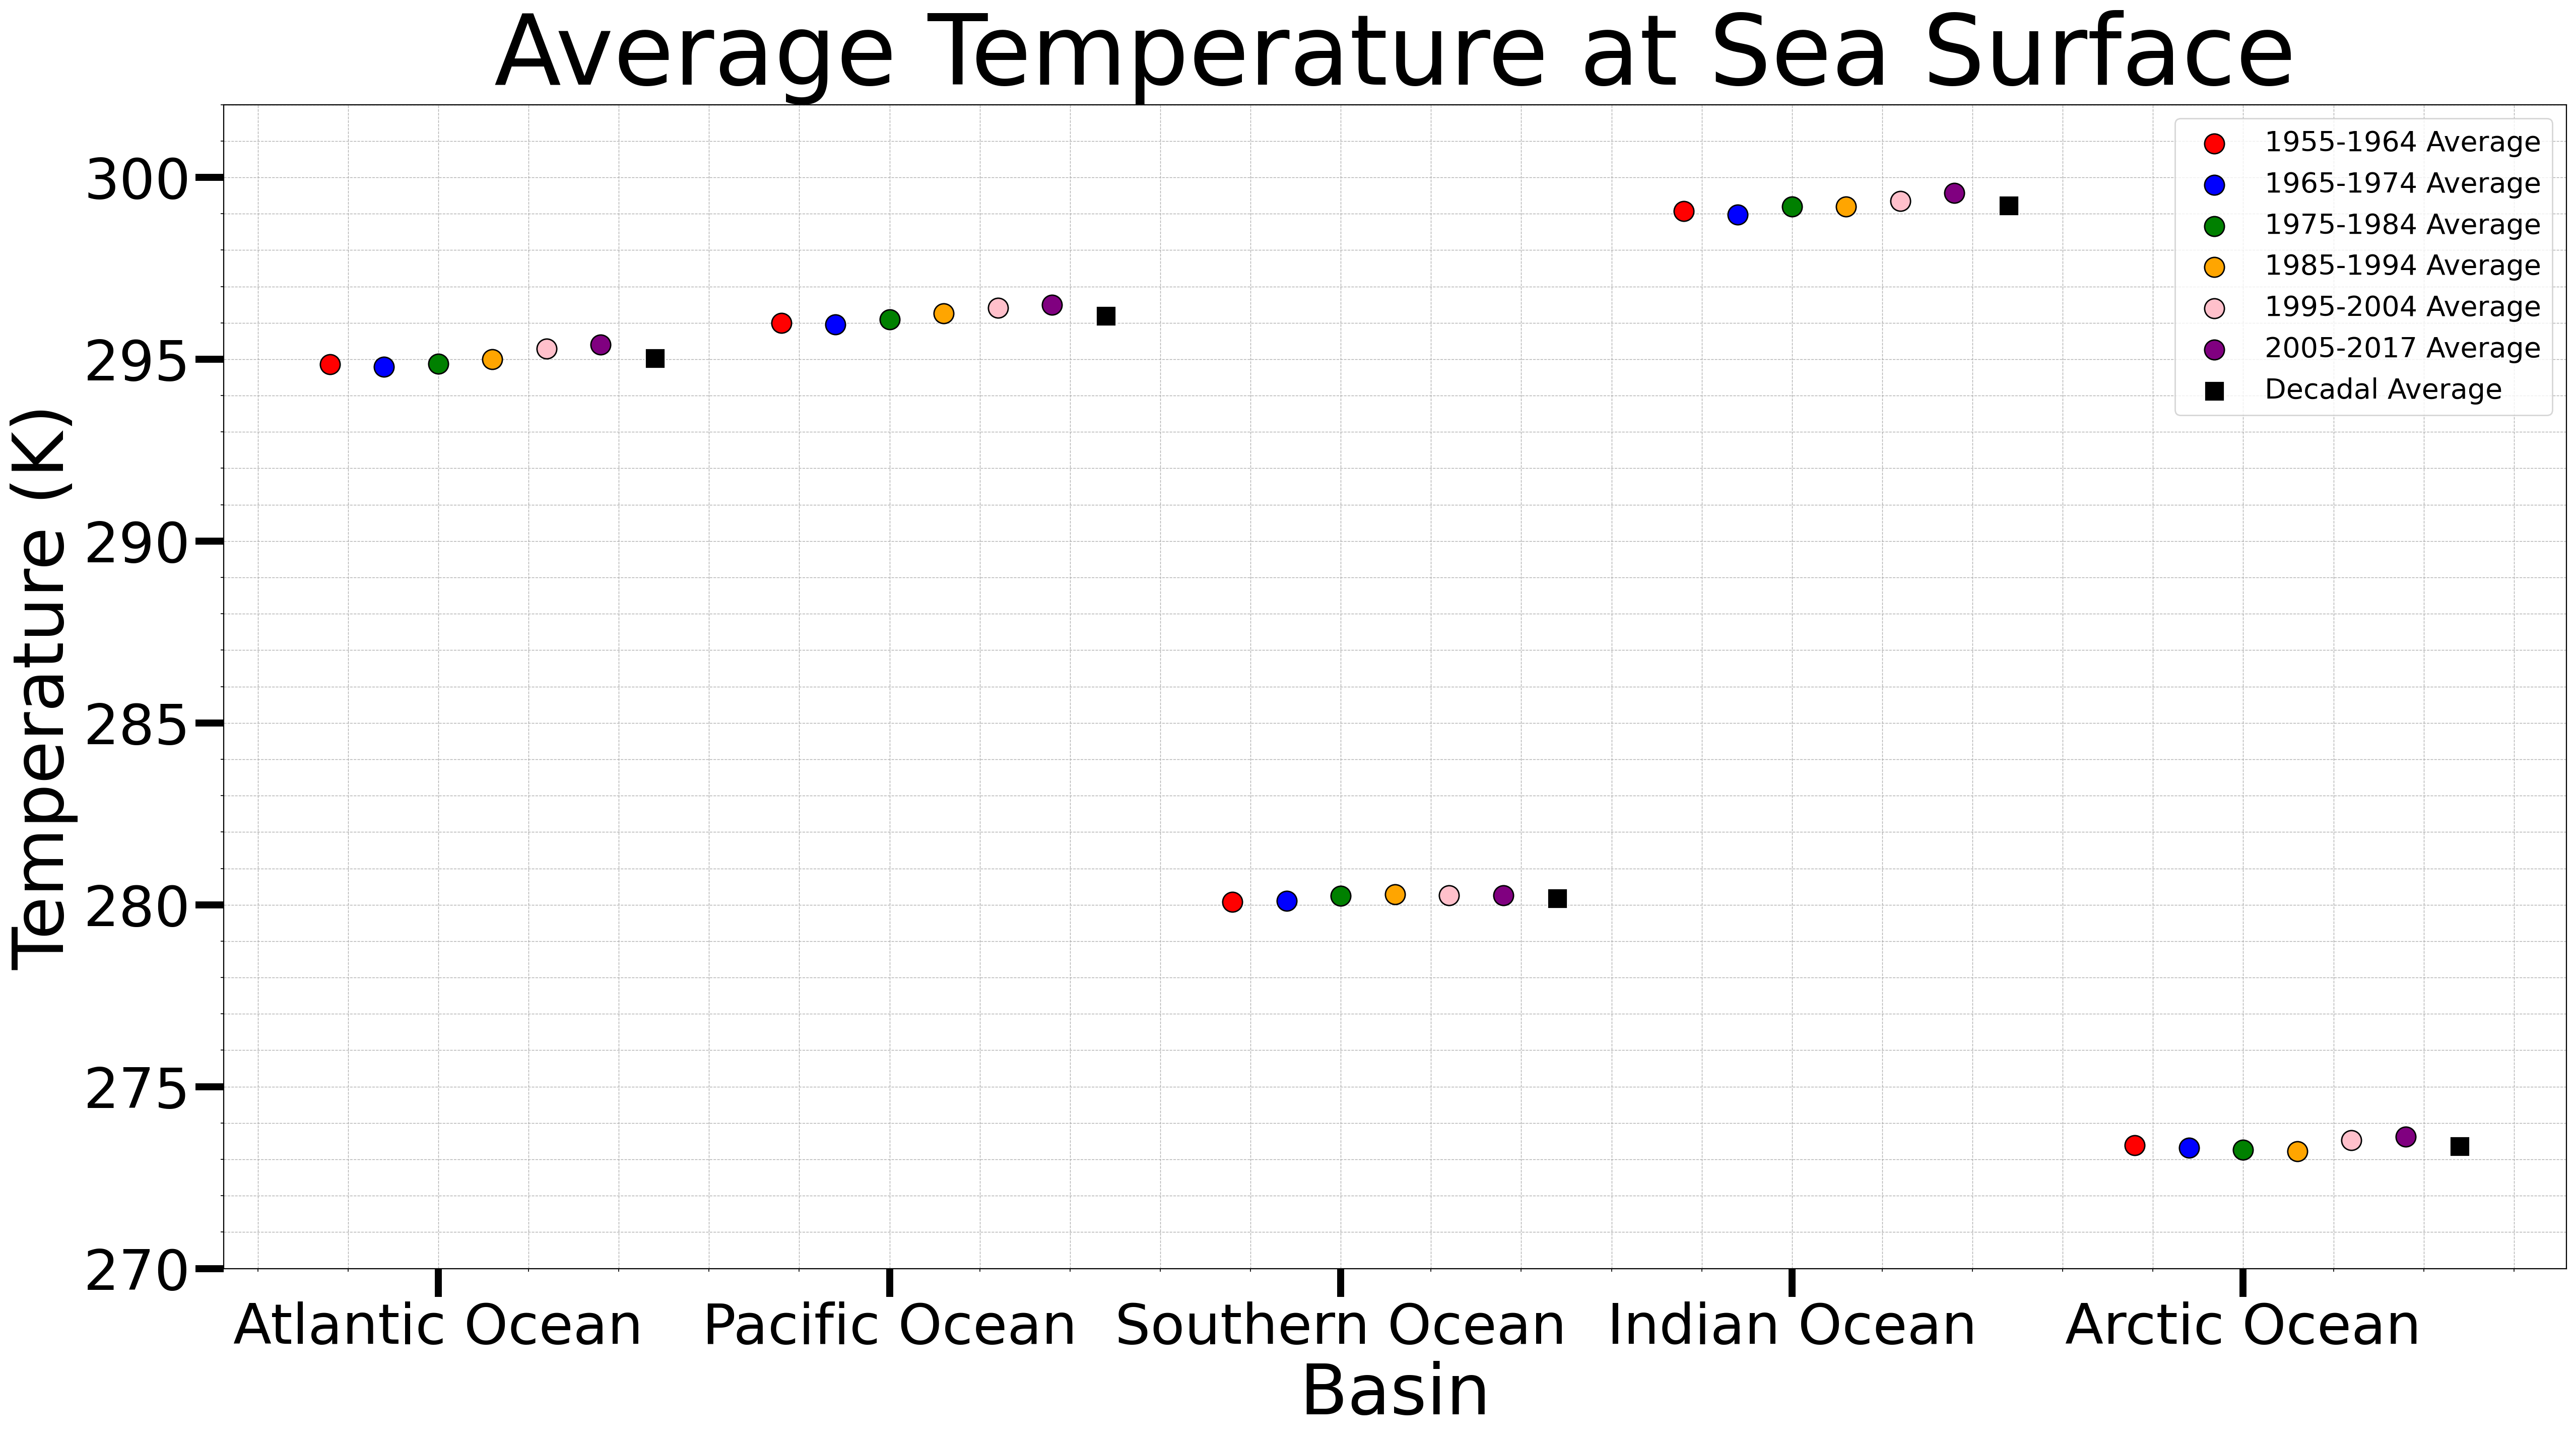

In [105]:
# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Data
X = ['Atlantic Ocean','Pacific Ocean','Southern Ocean','Indian Ocean', 'Arctic Ocean'] 
woa_55_64_0 = [294.8635393343315, 296.0029267903509, 280.0822753422839, 299.07818246171024, 273.38851683231576]
woa_65_74_0 = [294.79516970544915, 295.9584296517357, 280.10723057381244, 298.97054586023603, 273.3212232859529]
woa_75_84_0 = [294.87023239281694, 296.0920506772965, 280.24537872605873, 299.20223869655234, 273.2618570527621]
woa_85_94_0 = [295.00480152523, 296.2535499003611, 280.2870299005378, 299.1996023300199, 273.22590047631775]
woa_95_04_0 = [295.29045521228403, 296.4106378384172, 280.254141464555, 299.3552312848949, 273.524333363981]
woa_05_17_0 = [295.40189464969444, 296.4952002185726, 280.26222795997495, 299.57356057222046, 273.62513864820465]
woa_dec_0 = [295.02362195447733, 296.18980764587377, 280.1829316938642, 299.2181238822741, 273.36265266604335]

# X-axis positions for the oceans
X_axis = np.arange(len(X)) 

# Define marker size and shift for each series
marker_size = 200  # Adjust the size of the scatter points
shift = 0.12

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_0, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_0, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_0, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_0, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_0, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_0, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis + 4 * shift, woa_dec_0, color='black', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')
#ax.scatter(X_axis, woa_75_84_0, color='green', s=marker_size, edgecolor='black')

# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40) 
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (K)", fontsize=50 )
plt.title("Average Temperature at Sea Surface", fontsize=70) 
plt.ylim(270, 302)
ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)


 **Fig 1** 10 year average of surface temperature from 1955-2017 with decadal average from WOA18 

In [27]:
woa18_decav_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

In [28]:

weight_55_64_atlantic_1000=( woa18_1955_64_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_pacific_1000=( woa18_1955_64_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_southern_1000=( woa18_1955_64_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_indian_1000=( woa18_1955_64_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_arctic_1000=( woa18_1955_64_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_65_74_atlantic_1000=( woa18_1965_74_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_pacific_1000=( woa18_1965_74_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_southern_1000=( woa18_1965_74_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_indian_1000=( woa18_1965_74_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_arctic_1000=( woa18_1965_74_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_75_84_atlantic_1000=( woa18_1975_84_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_pacific_1000=( woa18_1975_84_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_southern_1000=( woa18_1975_84_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_indian_1000=( woa18_1975_84_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_arctic_1000=( woa18_1975_84_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_85_94_atlantic_1000=( woa18_1985_94_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_pacific_1000=( woa18_1985_94_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_southern_1000=( woa18_1985_94_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_indian_1000=( woa18_1985_94_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_arctic_1000=( woa18_1985_94_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_95_04_atlantic_1000=( woa18_1995_04_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_pacific_1000=( woa18_1995_04_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_southern_1000=( woa18_1995_04_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_indian_1000=( woa18_1995_04_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_arctic_1000=( woa18_1995_04_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_05_17_atlantic_1000=( woa18_2005_17_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_pacific_1000=( woa18_2005_17_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_southern_1000=( woa18_2005_17_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_indian_1000=( woa18_2005_17_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_arctic_1000=( woa18_2005_17_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_dec_atlantic_1000=(woa18_decav_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_pacific_1000=( woa18_decav_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_southern_1000=( woa18_decav_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_indian_1000=( woa18_decav_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_arctic_1000=(woa18_decav_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

In [29]:
print(weight_55_64_atlantic_1000.values+273.15)
print(weight_55_64_pacific_1000.values+273.15)
print(weight_55_64_southern_1000.values+273.15)
print(weight_55_64_indian_1000.values+273.15)
print(weight_55_64_arctic_1000.values+273.15)


278.3356984855818
277.3323817171934
276.11986327445584
279.16777633037805
272.9334257393466


In [30]:
print(weight_65_74_atlantic_1000.values+273.15)
print(weight_65_74_pacific_1000.values+273.15)
print(weight_65_74_southern_1000.values+273.15)
print(weight_65_74_indian_1000.values+273.15)
print(weight_65_74_arctic_1000.values+273.15)


278.3374980563937
277.3337130040305
276.1156235797099
279.18777954733383
272.9291524624802


In [31]:
print(weight_75_84_atlantic_1000.values+273.15)
print(weight_75_84_pacific_1000.values+273.15)
print(weight_75_84_southern_1000.values+273.15)
print(weight_75_84_indian_1000.values+273.15)
print(weight_75_84_arctic_1000.values+273.15)

278.37607929242404
277.3267388433676
276.1143929618216
279.19570753076397
272.9263790968569


In [32]:
print(weight_85_94_atlantic_1000.values+273.15)
print(weight_85_94_pacific_1000.values+273.15)
print(weight_85_94_southern_1000.values+273.15)
print(weight_85_94_indian_1000.values+273.15)
print(weight_85_94_arctic_1000.values+273.15)

278.4048966264735
277.3360121963109
276.1106178594331
279.17497249357257
272.92036704051344


In [33]:
print(weight_95_04_atlantic_1000.values+273.15)
print(weight_95_04_pacific_1000.values+273.15)
print(weight_95_04_southern_1000.values+273.15)
print(weight_95_04_indian_1000.values+273.15)
print(weight_95_04_arctic_1000.values+273.15)

278.41647774214283
277.348713216162
276.1637125232676
279.18072567606765
272.9298773509555


In [34]:
print(weight_05_17_atlantic_1000.values+273.15)
print(weight_05_17_pacific_1000.values+273.15)
print(weight_05_17_southern_1000.values+273.15)
print(weight_05_17_indian_1000.values+273.15)
print(weight_05_17_arctic_1000.values+273.15)

278.4434450762868
277.3604764574707
276.180647233702
279.2052482074726
272.9710709070518


In [35]:
print(weight_dec_atlantic_1000.values+273.15)
print(weight_dec_pacific_1000.values+273.15)
print(weight_dec_southern_1000.values+273.15)
print(weight_dec_indian_1000.values+273.15)
print(weight_dec_arctic_1000.values+273.15)

278.3855197263867
277.33916845658297
276.1331278578268
279.18384392432887
272.93543837409334


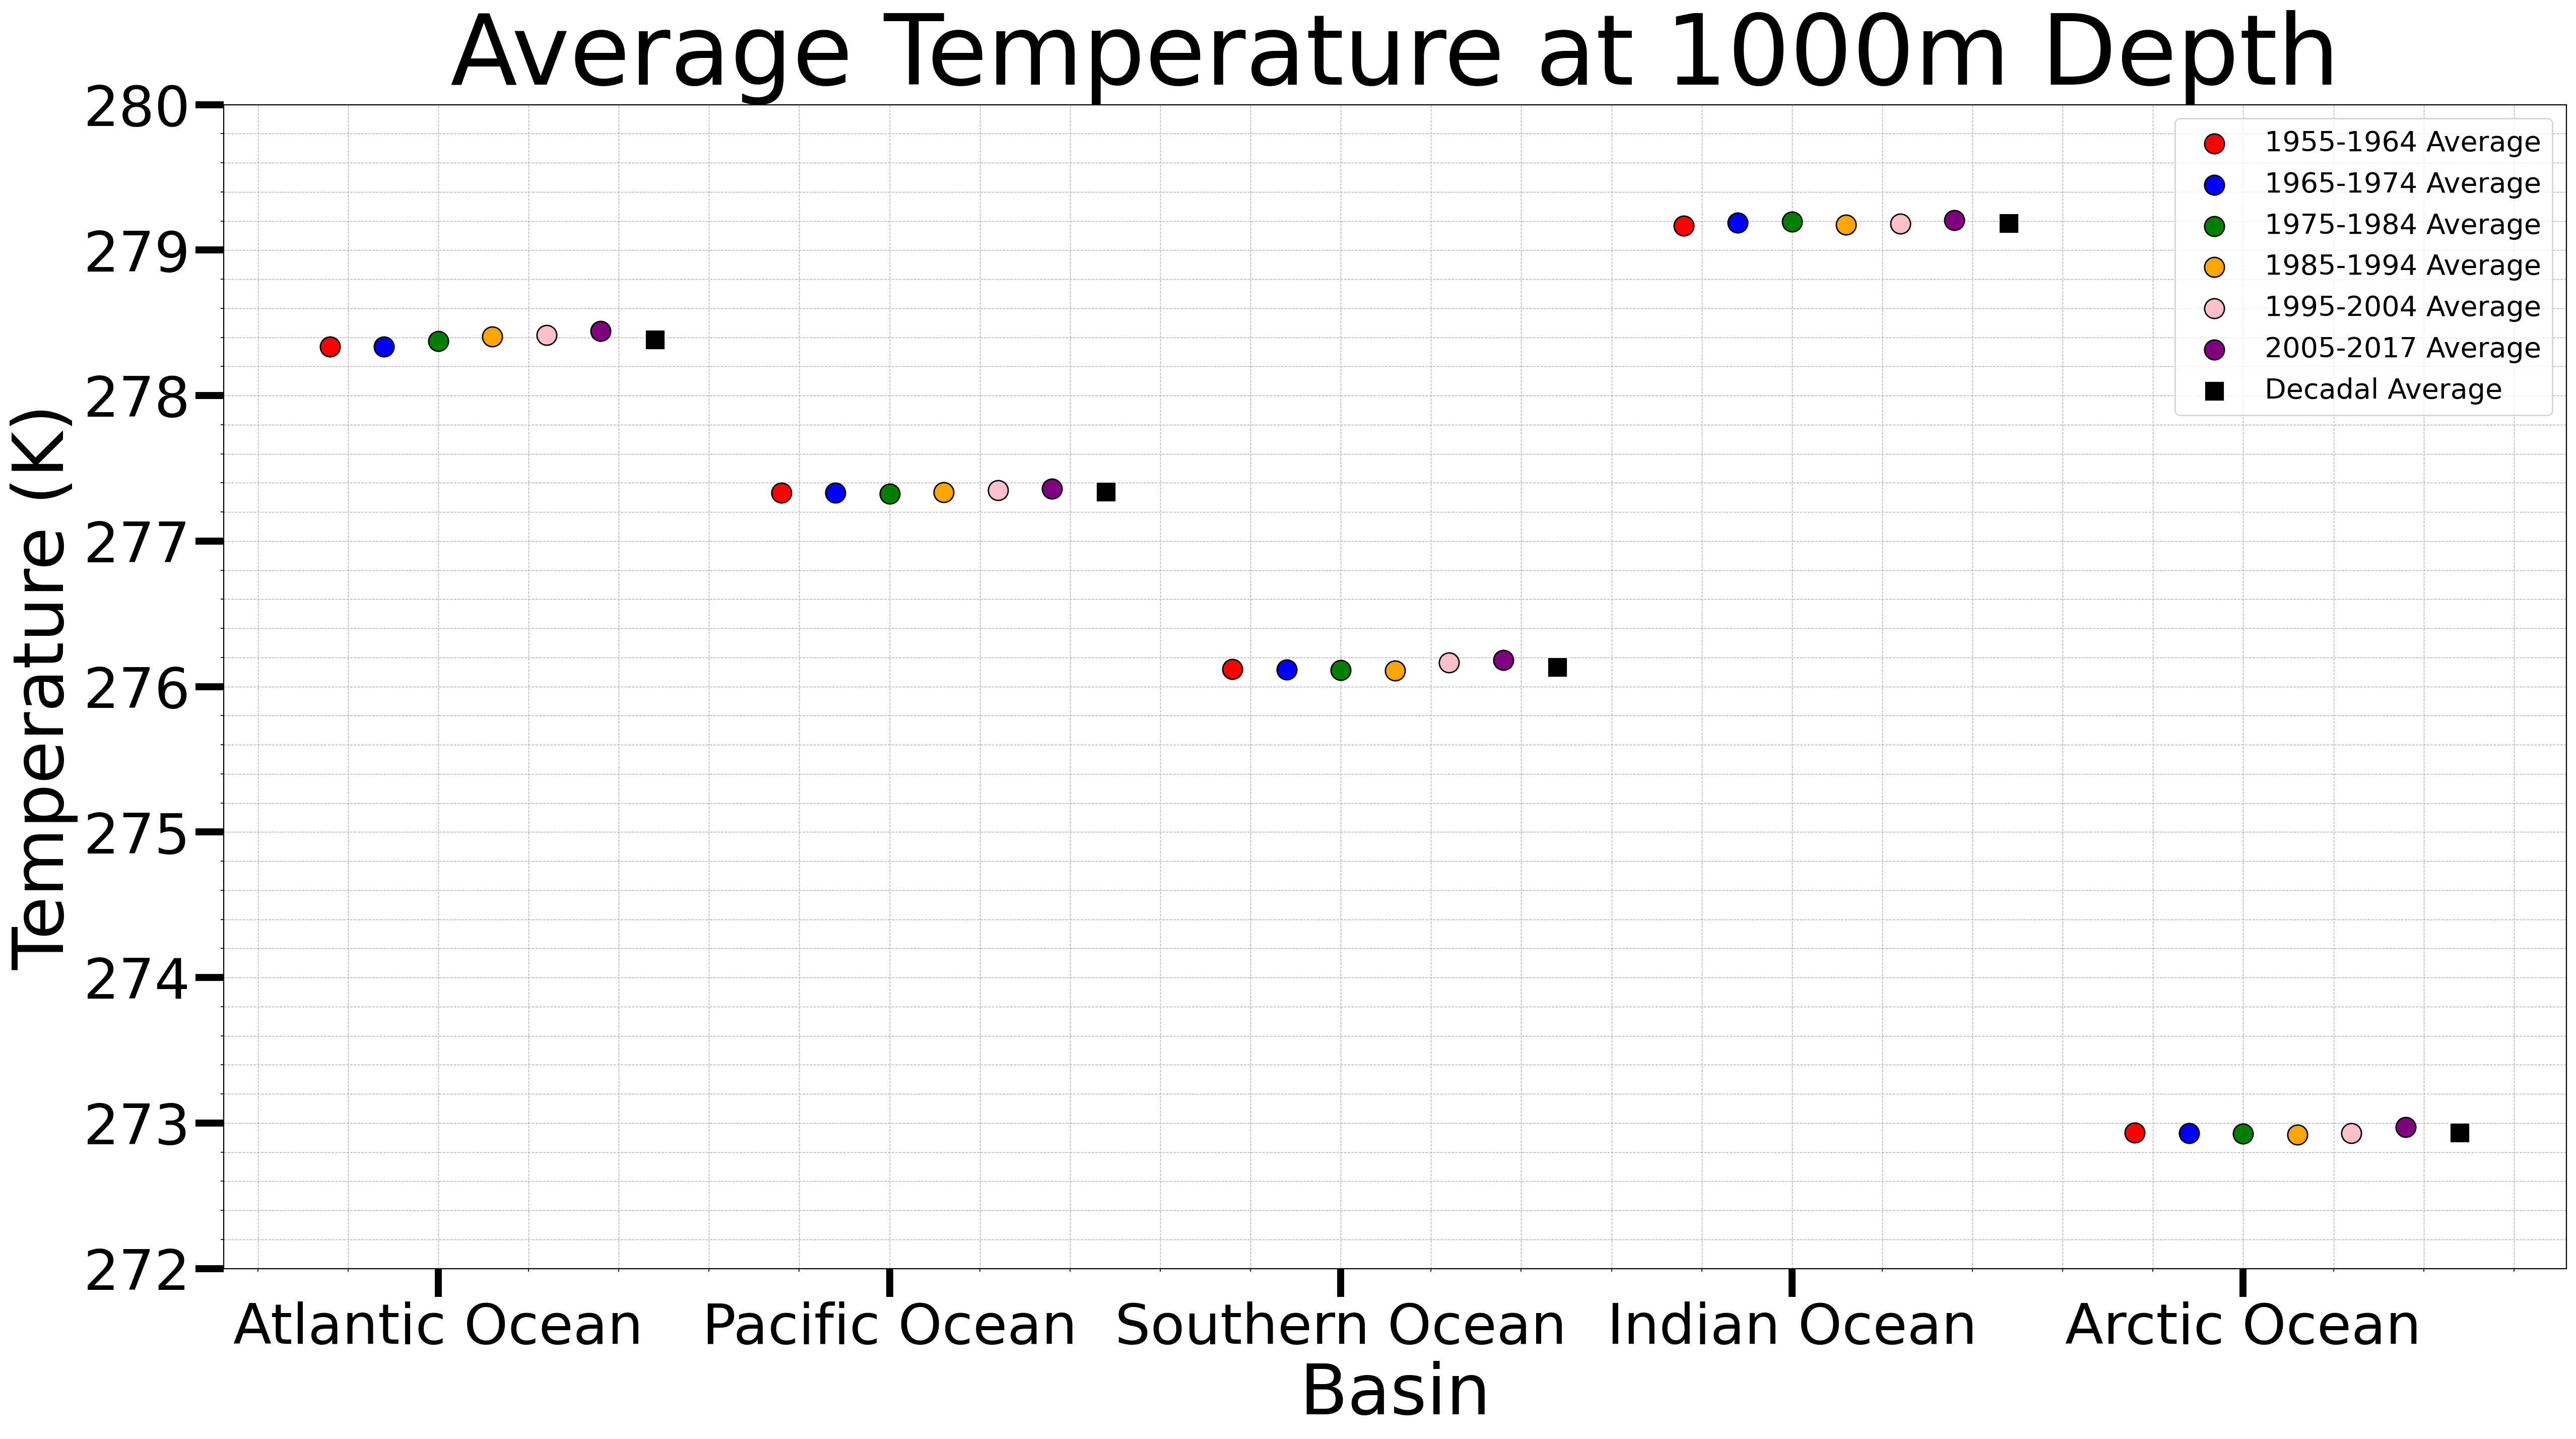

In [102]:
X = ['Atlantic Ocean', 'Pacific Ocean', 'Southern Ocean', 'Indian Ocean', 'Arctic Ocean'] 
woa_55_64_1000 = [278.3356984855818, 277.3323817171934, 276.11986327445584, 279.16777633037805, 272.9334257393466]
woa_65_74_1000 = [278.3374980563937, 277.3337130040305, 276.1156235797099, 279.18777954733383, 272.9291524624802]
woa_75_84_1000 = [278.37607929242404, 277.3267388433676, 276.1143929618216, 279.19570753076397, 272.9263790968569]
woa_85_94_1000 = [278.4048966264735, 277.3360121963109, 276.1106178594331, 279.17497249357257, 272.92036704051344]
woa_95_04_1000 = [278.41647774214283, 277.348713216162, 276.1637125232676, 279.18072567606765, 272.9298773509555]
woa_05_17_1000 = [278.4434450762868, 277.3604764574707, 276.180647233702, 279.2052482074726, 272.9710709070518]
woa_dec_1000 = [278.3855197263867, 277.33916845658297, 276.1331278578268, 279.18384392432887, 272.93543837409334]

# X-axis positions for the oceans
X_axis = np.arange(len(X)) 
marker_size = 200  # Adjust the size of the scatter points
shift = 0.12      # Shift for each dataset

# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_1000, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_1000, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_1000, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_1000, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_1000, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_1000, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis +4 * shift, woa_dec_1000, color='black', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')

# Add the new data (woa_dec_1000) in black with square markers


# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (K)", fontsize=50)
plt.title("Average Temperature at 1000m Depth", fontsize=70) 
plt.ylim(272, 280)
ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)

 **Fig 2** 10 year average of temperature in Kelvin at 1000m depth from 1955-2017 with decadal average from WOA18 

## Switch to scatter plot and can incorporate heat content data set, could average depths for heat content

In [37]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [38]:
gfdl_esm4_thetao_data = google_cloud_cmip6.query(
    "activity_id=='CMIP' & \
    table_id == 'Omon' & \
    variable_id == 'thetao' & \
    experiment_id == 'historical' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [39]:
gfdl_esm4_thetao_data

activity_id institution_id  source_id experiment_id member_id table_id  \
245206        CMIP      NOAA-GFDL  GFDL-ESM4    historical  r1i1p1f1     Omon   

       variable_id grid_label  \
245206      thetao         gr   

                                                   zstore  dcpp_init_year  \
245206  gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...             NaN   

         version  
245206  20190726

In [51]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = gfdl_esm4_thetao_data.zstore.values[-1]
mapper = gcs.get_mapper(zstore)

gfdl_esm4_thetao_data = xr.open_zarr(mapper, consolidated=True)
gfdl_esm4_thetao_data


<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lev: 35, lon: 360, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    thetao     (time, lev, lat, lon) float32 dask.array<chunksize=(12, 35, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    variable_id:            thetao
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/248958fd-cc5a-4876-a4b6-61edc24d6ddc...
    version_id:             v20190726

In [53]:
gfdl_esm4_thetao=gfdl_esm4_thetao_data.thetao

In [55]:
lat_esm4 =gfdl_esm4_thetao.coords['lat'].values #1-D numpy array of model's latitude values
lon_esm4 = gfdl_esm4_thetao.coords['lon'].values #1-D numpy array of model's longitude values

# make sure to replace the name of the data array if you chose a 
# different name and use the appropriate coordinate names within the ['']
# based on the coordinates of lat / lon in your dataset.

# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_esm4,lon_esm4)  

# The areacella_xarray function outputs a numpy array. Convert this back into 
# and xarray DataArray for further use. If this is a field you will be using 
# often. You may wish to save this newly created DataArray as a Dataset and save 
# as a netcdf file.

# here we assign dimensions and coordinates that are the same as our original SST array:

areacell_esm4 = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),\
                                                coords=(gfdl_esm4_thetao.coords['lat'],\
                                                        gfdl_esm4_thetao.coords['lon']))

In [56]:
weights_esm4=areacell_esm4

In [57]:
esm4_55_64=gfdl_esm4_thetao.sel(time=slice('1955-01-16', '1964-12-16')).mean('time')
esm4_65_74=gfdl_esm4_thetao.sel(time=slice('1965-01-16', '1974-12-16')).mean('time')
esm4_75_84=gfdl_esm4_thetao.sel(time=slice('1975-01-16', '1984-12-16')).mean('time')
esm4_85_94=gfdl_esm4_thetao.sel(time=slice('1985-01-16', '1994-12-16')).mean('time')
esm4_95_04=gfdl_esm4_thetao.sel(time=slice('1995-01-16', '2004-12-16')).mean('time')
esm4_05_17=gfdl_esm4_thetao.sel(time=slice('2005-01-16', '2017-12-16')).mean('time')
esm4_dec_av=((esm4_55_64+esm4_65_74+esm4_75_84+esm4_85_94+esm4_95_04+esm4_05_17)/6)

In [58]:
esm4_55_64

<xarray.DataArray 'thetao' (lev: 35, lat: 180, lon: 360)>
dask.array<mean_agg-aggregate, shape=(35, 180, 360), dtype=float32, chunksize=(35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

In [63]:

    weight_esm4_55_64_atlantic_0=(esm4_55_64*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_pacific_0=( esm4_55_64*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_southern_0=( esm4_55_64*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_indian_0=( esm4_55_64*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_arctic_0=( esm4_55_64*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_65_74_atlantic_0=( esm4_65_74*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_pacific_0=(esm4_65_74*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_southern_0=(esm4_65_74*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_indian_0=( esm4_65_74*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_arctic_0=( esm4_65_74*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_75_84_atlantic_0=( esm4_75_84*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_pacific_0=( esm4_75_84*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_southern_0=( esm4_75_84*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_indian_0=( esm4_75_84*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_arctic_0=( esm4_75_84*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_85_94_atlantic_0=( esm4_85_94*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_pacific_0=( esm4_85_94*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_southern_0=( esm4_85_94*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_indian_0=( esm4_85_94*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_arctic_0=( esm4_85_94*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_95_04_atlantic_0=( esm4_95_04*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_pacific_0=( esm4_95_04*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_southern_0=( esm4_95_04*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_indian_0=( esm4_95_04*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_arctic_0=( esm4_95_04*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_05_17_atlantic_0=( esm4_05_17*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_pacific_0=( esm4_05_17*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_southern_0=( esm4_05_17*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_indian_0=( esm4_05_17*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_arctic_0=( esm4_05_17*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_dec_atlantic_0=(esm4_dec_av*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_pacific_0=( esm4_dec_av*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_southern_0=( esm4_dec_av*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_indian_0=( esm4_dec_av*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_arctic_0=(esm4_dec_av*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

In [64]:

    weight_esm4_55_64_atlantic_1000=(esm4_55_64*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_pacific_1000=( esm4_55_64*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_southern_1000=( esm4_55_64*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_indian_1000=( esm4_55_64*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_arctic_1000=( esm4_55_64*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_65_74_atlantic_1000=( esm4_65_74*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_pacific_1000=(esm4_65_74*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_southern_1000=(esm4_65_74*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_indian_1000=( esm4_65_74*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_arctic_1000=( esm4_65_74*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_75_84_atlantic_1000=( esm4_75_84*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_pacific_1000=( esm4_75_84*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_southern_1000=( esm4_75_84*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_indian_1000=( esm4_75_84*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_arctic_1000=( esm4_75_84*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_85_94_atlantic_1000=( esm4_85_94*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_pacific_1000=( esm4_85_94*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_southern_1000=( esm4_85_94*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_indian_1000=( esm4_85_94*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_arctic_1000=( esm4_85_94*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_95_04_atlantic_1000=( esm4_95_04*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_pacific_1000=( esm4_95_04*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_southern_1000=( esm4_95_04*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_indian_1000=( esm4_95_04*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_arctic_1000=( esm4_95_04*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_05_17_atlantic_1000=( esm4_05_17*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_pacific_1000=( esm4_05_17*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_southern_1000=( esm4_05_17*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_indian_1000=( esm4_05_17*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_arctic_1000=( esm4_05_17*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_dec_atlantic_1000=(esm4_dec_av*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_pacific_1000=( esm4_dec_av*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_southern_1000=( esm4_dec_av*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_indian_1000=( esm4_dec_av*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_arctic_1000=(esm4_dec_av*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

In [65]:

print(weight_esm4_55_64_atlantic_0.values+273.15)
print(weight_esm4_55_64_pacific_0.values+273.15)
print(weight_esm4_55_64_southern_0.values+273.15)
print(weight_esm4_55_64_indian_0.values+273.15)
print(weight_esm4_55_64_arctic_0.values+273.15)

295.20500741137505
295.9885019682676
281.04628584165215
298.86300323063034
273.59841313110263


In [67]:
print(weight_esm4_65_74_atlantic_0.values+273.15)
print(weight_esm4_65_74_pacific_0.values+273.15)
print(weight_esm4_65_74_southern_0.values+273.15)
print(weight_esm4_65_74_indian_0.values+273.15)
print(weight_esm4_65_74_arctic_0.values+273.15)


295.3521800818568
295.8898821778498
281.10759768342405
298.8845272735366
273.4424019707229


In [68]:
print(weight_esm4_75_84_atlantic_0.values+273.15)
print(weight_esm4_75_84_pacific_0.values+273.15)
print(weight_esm4_75_84_southern_0.values+273.15)
print(weight_esm4_75_84_indian_0.values+273.15)
print(weight_esm4_75_84_arctic_0.values+273.15)

295.3727430505125
295.95895123709494
281.2277847787796
299.0700818371443
273.0667933904862


In [71]:
print(weight_esm4_85_94_atlantic_0.values+273.15)
print(weight_esm4_85_94_pacific_0.values+273.15)
print(weight_esm4_85_94_southern_0.values+273.15)
print(weight_esm4_85_94_indian_0.values+273.15)
print(weight_esm4_85_94_arctic_0.values+273.15)

295.43798885505095
295.9046804493533
281.3426622959146
299.03684744365916
273.3895837570613


In [72]:
print(weight_esm4_95_04_atlantic_0.values+273.15)
print(weight_esm4_95_04_pacific_0.values+273.15)
print(weight_esm4_95_04_southern_0.values+273.15)
print(weight_esm4_95_04_indian_0.values+273.15)
print(weight_esm4_95_04_arctic_0.values+273.15)

295.49866168231443
296.1376116707924
281.4542611726738
299.2584916746805
273.48766831349934


In [73]:
print(weight_esm4_05_17_atlantic_0.values+273.15)
print(weight_esm4_05_17_pacific_0.values+273.15)
print(weight_esm4_05_17_southern_0.values+273.15)
print(weight_esm4_05_17_indian_0.values+273.15)
print(weight_esm4_05_17_arctic_0.values+273.15)

295.9357225903099
296.3527717956061
281.57406720676136
299.3505944933146
273.50745356860944


In [74]:
print(weight_esm4_dec_atlantic_0.values+273.15)
print(weight_esm4_dec_pacific_0.values+273.15)
print(weight_esm4_dec_southern_0.values+273.15)
print(weight_esm4_dec_indian_0.values+273.15)
print(weight_esm4_dec_arctic_0.values+273.15)


295.46705067814486
296.038733235526
281.2921098511405
299.07725766777213
273.4153856935717


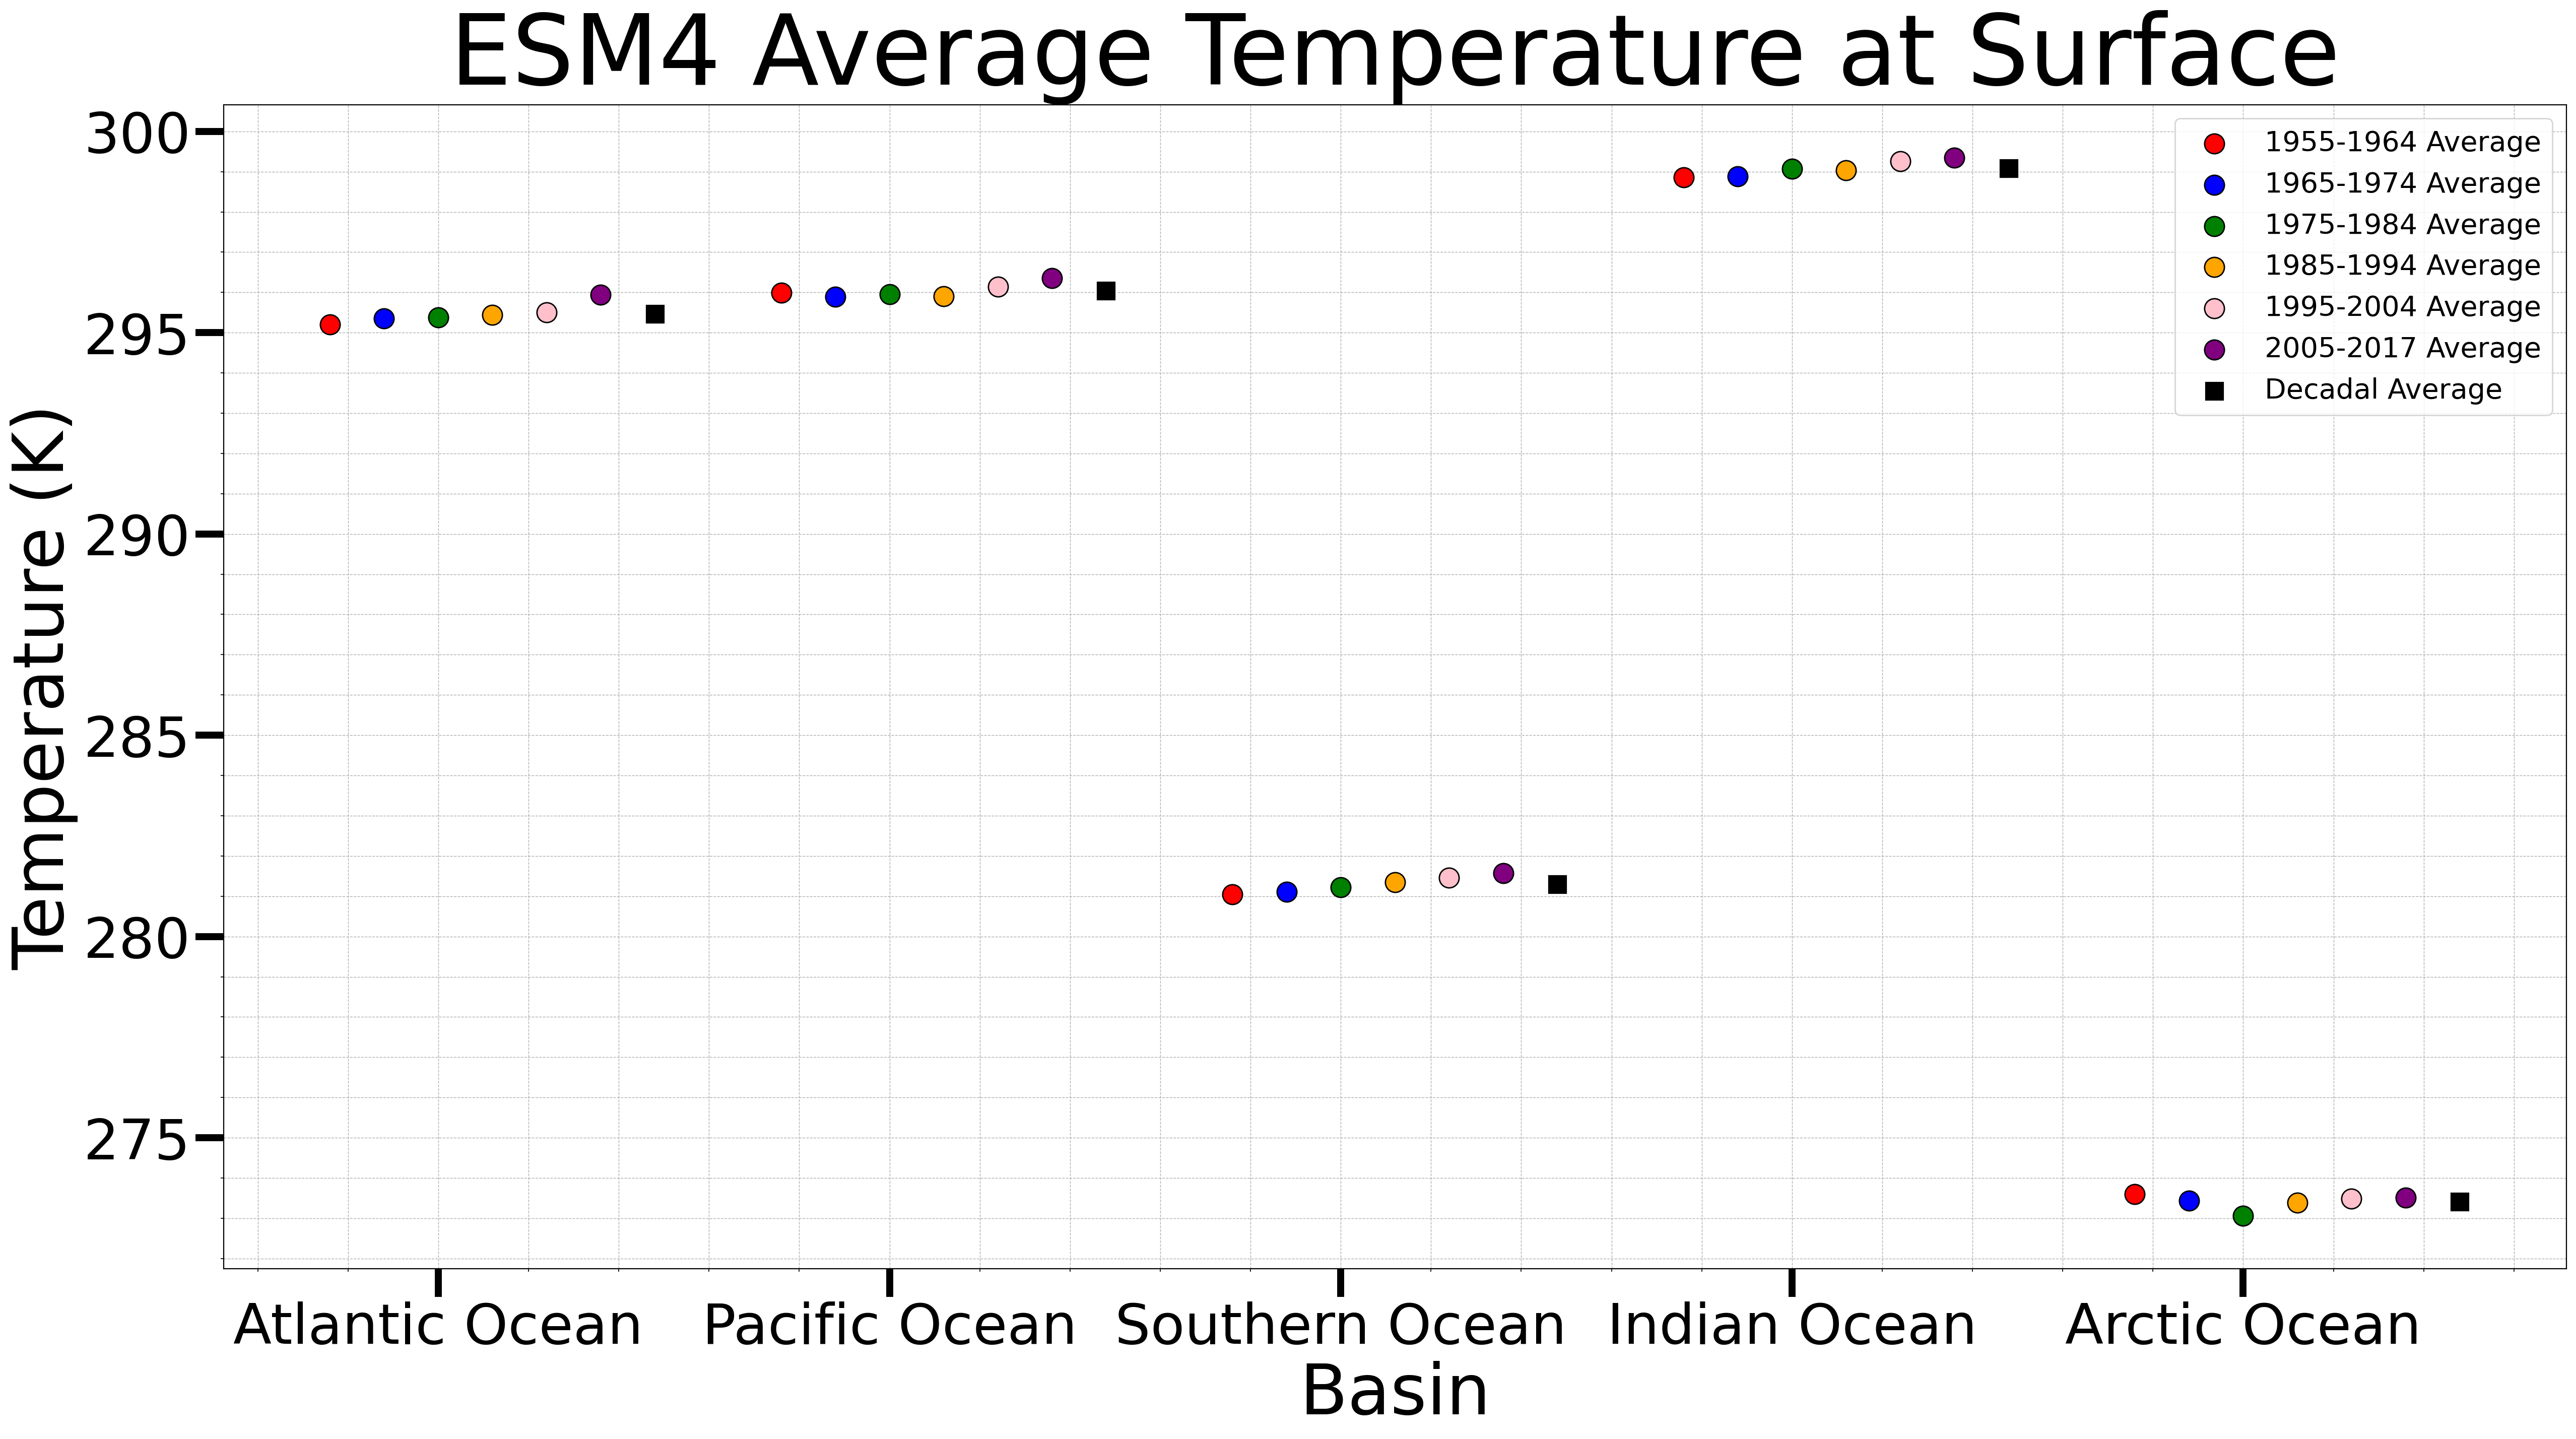

In [96]:
X = ['Atlantic Ocean', 'Pacific Ocean', 'Southern Ocean', 'Indian Ocean', 'Arctic Ocean'] 
woa_55_64_0 = [295.20500741137505,
295.9885019682676,
281.04628584165215,
298.86300323063034,
273.59841313110263]
woa_65_74_0 = [295.3521800818568,
295.8898821778498,
281.10759768342405,
298.8845272735366,
273.4424019707229
]
woa_75_84_0 = [295.3727430505125,
295.95895123709494,
281.2277847787796,
299.0700818371443,
273.0667933904862]
woa_85_94_0 = [295.43798885505095,
295.9046804493533,
281.3426622959146,
299.03684744365916,
273.3895837570613]
woa_95_04_0 = [295.49866168231443,
296.1376116707924,
281.4542611726738,
299.2584916746805,
273.48766831349934]
woa_05_17_0 = [295.9357225903099,
296.3527717956061,
281.57406720676136,
299.3505944933146,
273.50745356860944]
woa_dec_0 = [295.46705067814486,
296.038733235526,
281.2921098511405,
299.07725766777213,
273.4153856935717]

# X-axis positions for the oceans
X_axis = np.arange(len(X)) 
marker_size = 200  # Adjust the size of the scatter points
shift = 0.12      # Shift for each dataset

# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_0, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_0, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_0, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_0, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_0, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_0, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis + 4 * shift, woa_dec_0, color='black', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')

# Add the new data (woa_dec_1000) in black with square markers


# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (K)", fontsize=50)
plt.title("ESM4 Average Temperature at Surface", fontsize=70) 

ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)

 **Fig 3** 10 year average of temperature in Kelvin at surface from 1955-2017 with decadal average from ESM4

In [78]:
print(weight_esm4_55_64_atlantic_1000.values+273.15)
print(weight_esm4_55_64_pacific_1000.values+273.15)
print(weight_esm4_55_64_southern_1000.values+273.15)
print(weight_esm4_55_64_indian_1000.values+273.15)
print(weight_esm4_55_64_arctic_1000.values+273.15)


278.0664392751185
277.1723870794023
276.3133301334217
278.7031352471946
273.70251586495095


In [79]:
print(weight_esm4_65_74_atlantic_1000.values+273.15)
print(weight_esm4_65_74_pacific_1000.values+273.15)
print(weight_esm4_65_74_southern_1000.values+273.15)
print(weight_esm4_65_74_indian_1000.values+273.15)
print(weight_esm4_65_74_arctic_1000.values+273.15)


278.0743645870752
277.18314594928955
276.26644650001896
278.6769050954484
273.7326224597781


In [80]:
print(weight_esm4_75_84_atlantic_1000.values+273.15)
print(weight_esm4_75_84_pacific_1000.values+273.15)
print(weight_esm4_75_84_southern_1000.values+273.15)
print(weight_esm4_75_84_indian_1000.values+273.15)
print(weight_esm4_75_84_arctic_1000.values+273.15)

278.0869812392169
277.18523653273
276.279364221515
278.65675472939415
273.69583643027585


In [81]:
print(weight_esm4_85_94_atlantic_1000.values+273.15)
print(weight_esm4_85_94_pacific_1000.values+273.15)
print(weight_esm4_85_94_southern_1000.values+273.15)
print(weight_esm4_85_94_indian_1000.values+273.15)
print(weight_esm4_85_94_arctic_1000.values+273.15)

278.09497160082026
277.1664334349854
276.3039048270483
278.6508141094541
273.6791121025267


In [82]:
print(weight_esm4_95_04_atlantic_1000.values+273.15)
print(weight_esm4_95_04_pacific_1000.values+273.15)
print(weight_esm4_95_04_southern_1000.values+273.15)
print(weight_esm4_95_04_indian_1000.values+273.15)
print(weight_esm4_95_04_arctic_1000.values+273.15)

278.1030297944277
277.16246957050583
276.29634390182076
278.64985431554726
273.7049380581636


In [83]:
print(weight_esm4_05_17_atlantic_1000.values+273.15)
print(weight_esm4_05_17_pacific_1000.values+273.15)
print(weight_esm4_05_17_southern_1000.values+273.15)
print(weight_esm4_05_17_indian_1000.values+273.15)
print(weight_esm4_05_17_arctic_1000.values+273.15)

278.13257011514025
277.1567692751987
276.3235037338878
278.667967504723
273.6421064692427


In [84]:
print(weight_esm4_dec_atlantic_1000.values+273.15)
print(weight_esm4_dec_pacific_1000.values+273.15)
print(weight_esm4_dec_southern_1000.values+273.15)
print(weight_esm4_dec_indian_1000.values+273.15)
print(weight_esm4_dec_arctic_1000.values+273.15)


278.09305943850285
277.1710736416451
276.297148893336
278.6675718277278
273.6928552309679


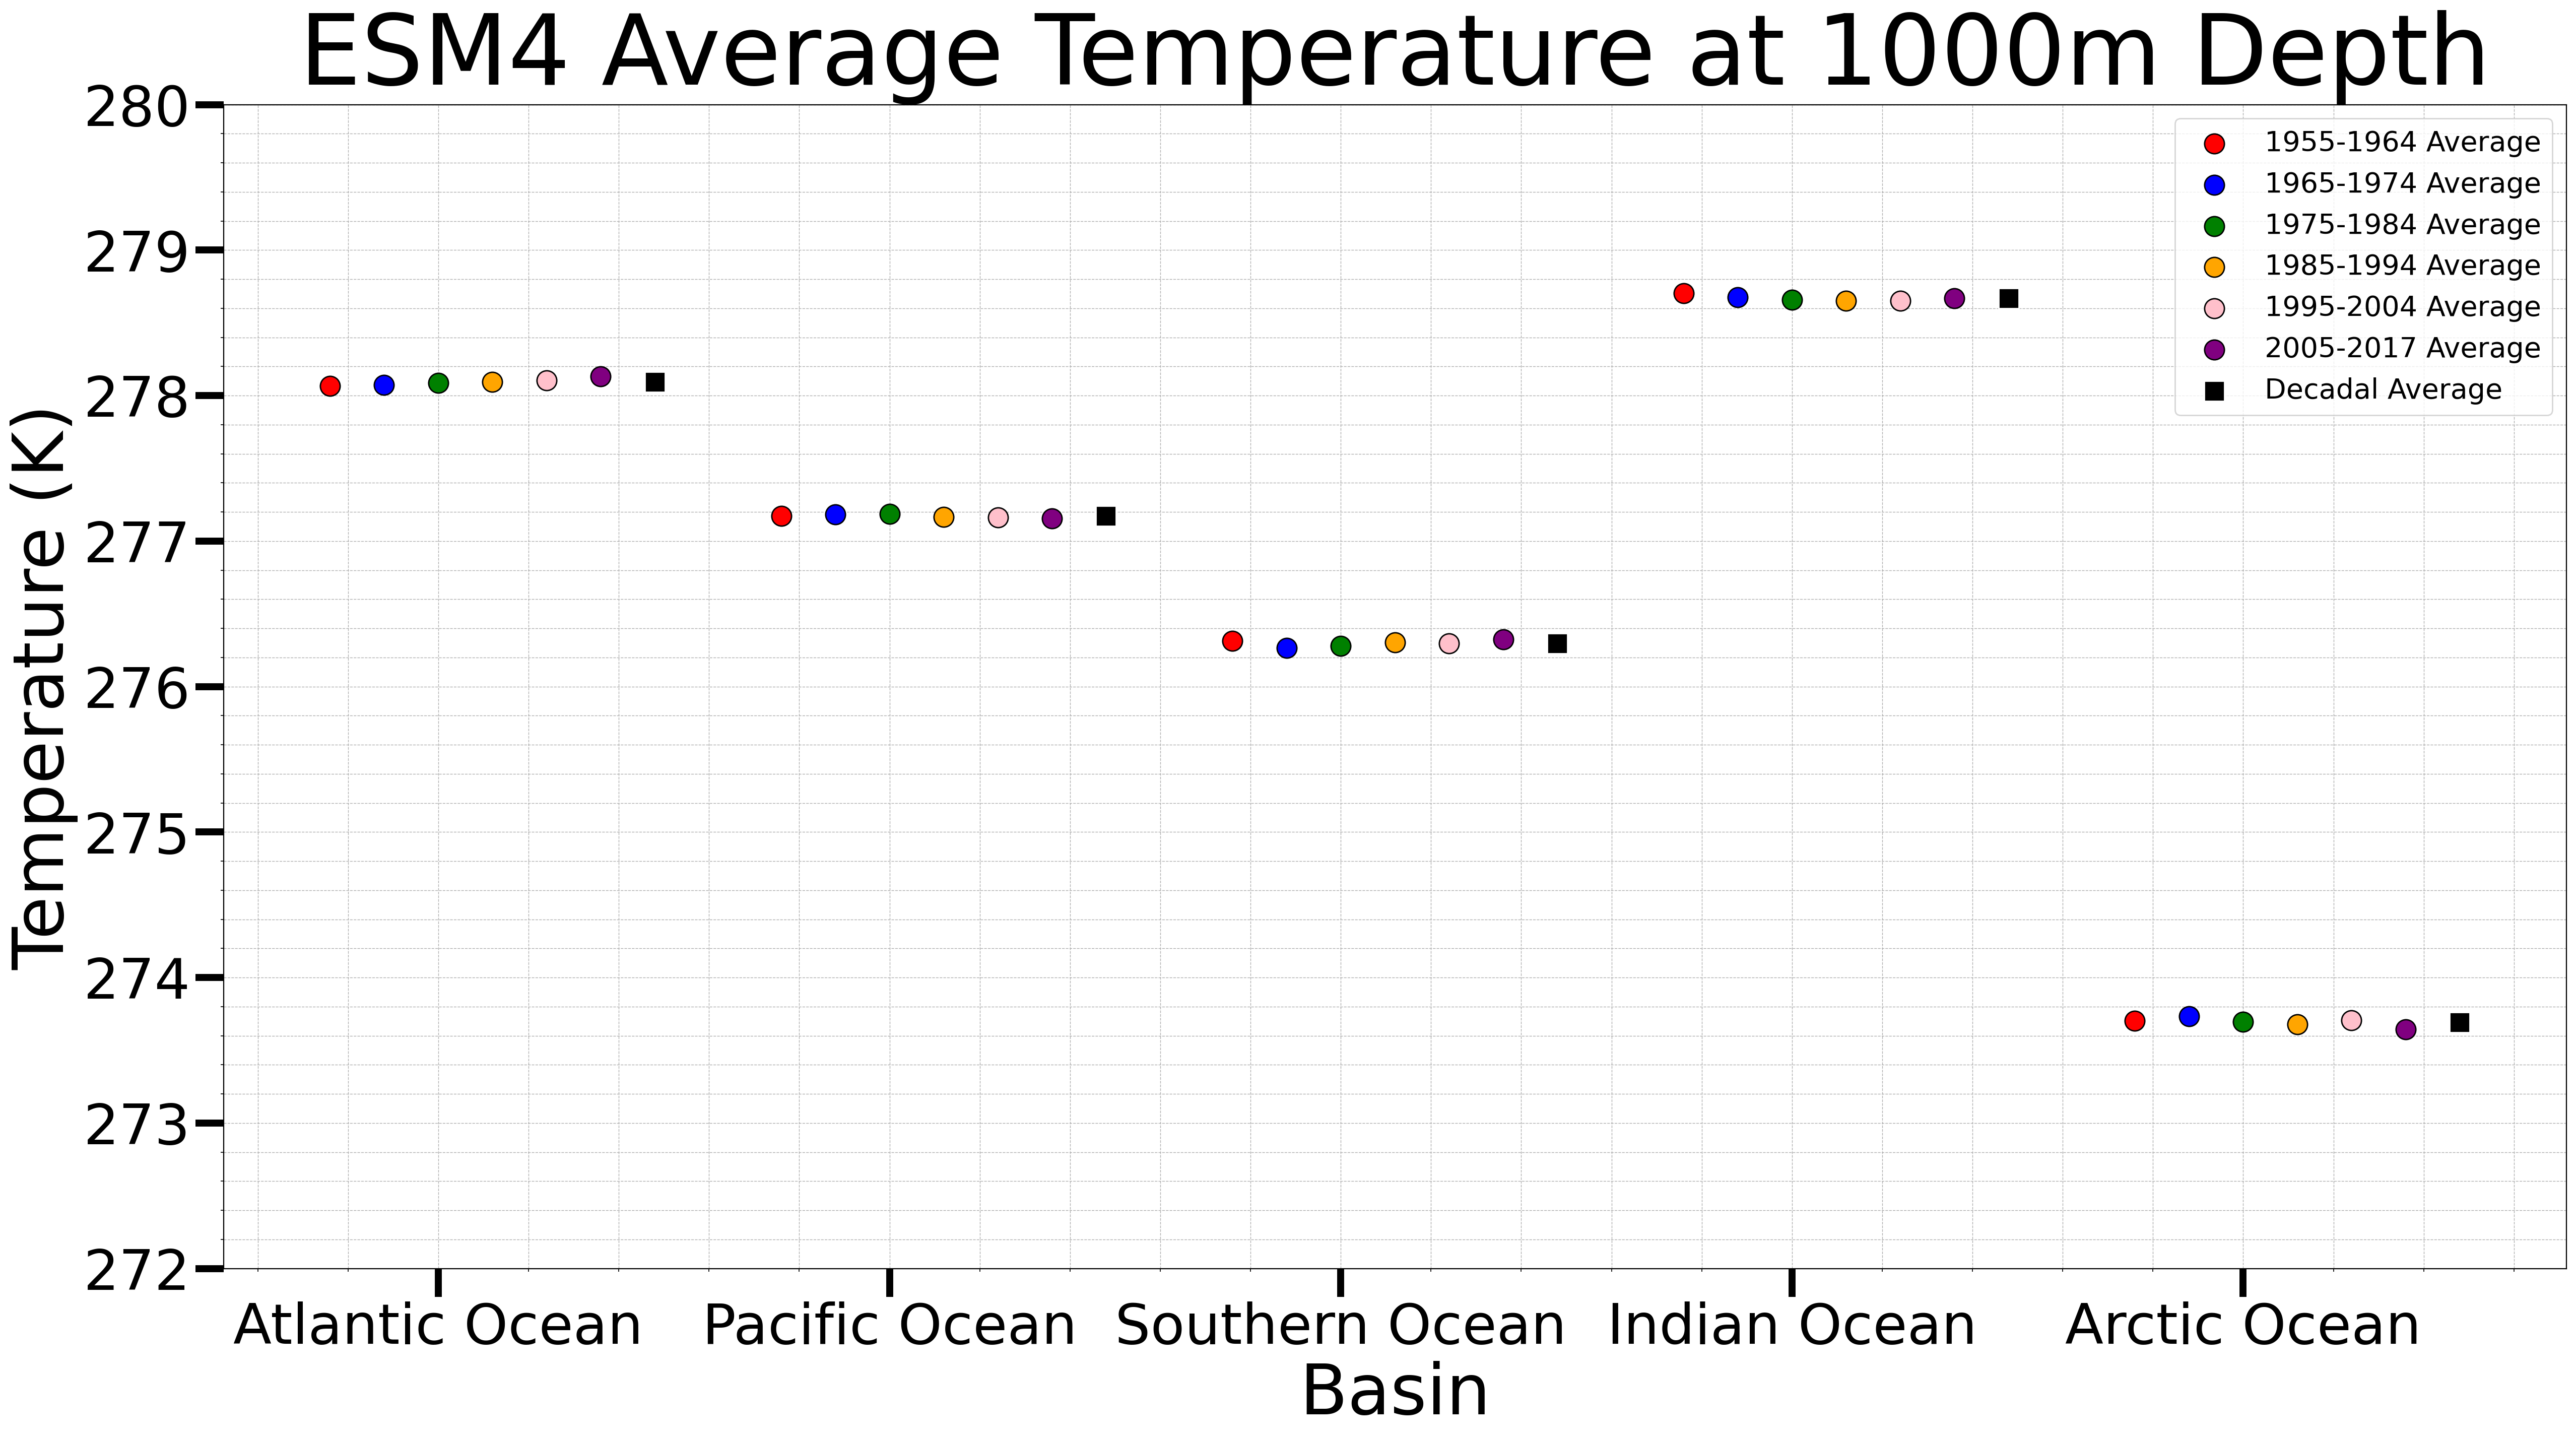

In [99]:
X = ['Atlantic Ocean', 'Pacific Ocean', 'Southern Ocean', 'Indian Ocean', 'Arctic Ocean'] 
woa_55_64_1000 = [278.0664392751185,
277.1723870794023,
276.3133301334217,
278.7031352471946,
273.70251586495095]
woa_65_74_1000 = [278.0743645870752,
277.18314594928955,
276.26644650001896,
278.6769050954484,
273.7326224597781]
woa_75_84_1000 = [278.0869812392169,
277.18523653273,
276.279364221515,
278.65675472939415,
273.69583643027585]
woa_85_94_1000 = [278.09497160082026,
277.1664334349854,
276.3039048270483,
278.6508141094541,
273.6791121025267
]
woa_95_04_1000 = [278.1030297944277,
277.16246957050583,
276.29634390182076,
278.64985431554726,
273.7049380581636]
woa_05_17_1000 = [278.13257011514025,
277.1567692751987,
276.3235037338878,
278.667967504723,
273.6421064692427

]
woa_dec_1000 = [278.09305943850285,
277.1710736416451,
276.297148893336,
278.6675718277278,
273.6928552309679]

# X-axis positions for the oceans
X_axis = np.arange(len(X)) 
marker_size = 200  # Adjust the size of the scatter points
shift = 0.12     # Shift for each dataset

# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_1000, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_1000, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_1000, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_1000, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_1000, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_1000, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis+4*shift, woa_dec_1000, color='black', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')

# Add the new data (woa_dec_1000) in black with square markers


# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (K)", fontsize=50)
plt.title("ESM4 Average Temperature at 1000m Depth", fontsize=70) 
plt.ylim(272, 280)
ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)

 **Fig 4** 10 year average of temperature in Kelvin at 1000m depth from 1955-2017 with decadal average from ESM4 